## LAB-4: Implement DJ algorithm using IBM Simulator and/Or Qiskit

## Name: Neelanjan Dutta

## Register number: 2448040

## Importing packages:

In [1]:
from qiskit import QuantumCircuit, transpile
import matplotlib.pyplot as plt

## Constant oracle:

In [2]:
def constant_oracle(n, output_bit=0):
    qc = QuantumCircuit(n + 1, name=f"const_{output_bit}")
    if output_bit == 1:
        qc.x(n)  # Flip the output qubit to 1
    return qc

## Balanced oracle:

In [3]:
def balanced_oracle_parity(n):
    qc = QuantumCircuit(n + 1, name="balanced_parity")
    for i in range(n):
        qc.cx(i, n)  # CNOT from input i to output n   
    return qc

## Deustch Jozsa Algorithm:

In [4]:
def deutsch_jozsa(n, oracle_circ):
    qc = QuantumCircuit(n + 1, n)
    # Initialization
    qc.x(n)
    qc.h(n)
    for i in range(n):
        qc.h(i)
    # Oracle
    qc.append(oracle_circ.to_instruction(), range(n + 1)) 
    # Decompose the oracle to show CNOTs, etc.
    qc = qc.decompose([oracle_circ.name]) 
    # Final Hadamards
    for i in range(n):
        qc.h(i)      
    # Measure
    for i in range(n):
        qc.measure(i, i)     
    return qc

## Main function:

Enter the number of input qubits (n)  3



Generating circuits for n = 3

Displaying circuit diagrams in a new window...


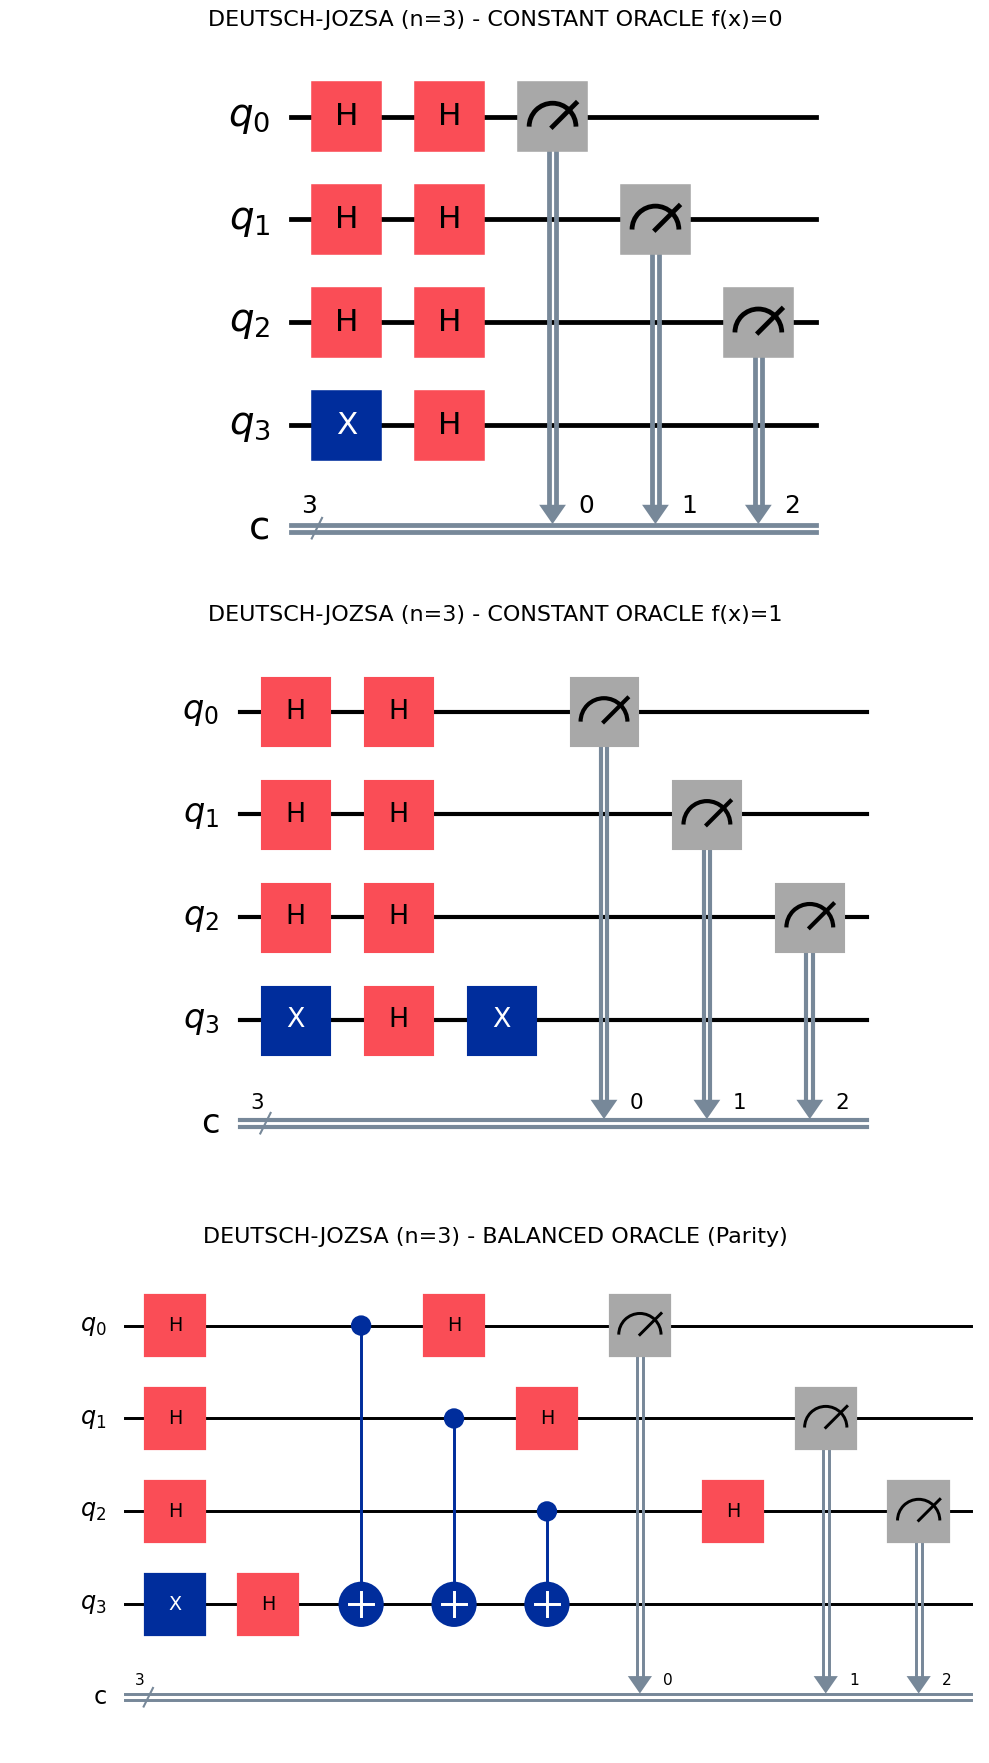

In [5]:
if __name__ == "__main__":
    try:
        # Get user input for the number of qubits
        n_str = input("Enter the number of input qubits (n) ")
        n = int(n_str)
        
        if n < 1:
            print("Error: Number of qubits (n) must be 1 or greater.")
        else:
            print(f"\nGenerating circuits for n = {n}\n")
            
            # Create all 3 circuits
            oracle_const_0 = constant_oracle(n, output_bit=0)
            dj_circ_const_0 = deutsch_jozsa(n, oracle_const_0)
            
            oracle_const_1 = constant_oracle(n, output_bit=1)
            dj_circ_const_1 = deutsch_jozsa(n, oracle_const_1)

            oracle_balanced = balanced_oracle_parity(n)
            dj_circ_balanced = deutsch_jozsa(n, oracle_balanced)

            # Creating a Matplotlib figure with 3 subplots 
            fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12 + n*2))
            
            # Circuit 1: Constant f(x)=0 
            dj_circ_const_0.draw(output='mpl', ax=ax1)
            ax1.set_title(f"DEUTSCH-JOZSA (n={n}) - CONSTANT ORACLE f(x)=0", fontsize=16)

            # Circuit 2: Constant f(x)=1 
            dj_circ_const_1.draw(output='mpl', ax=ax2)
            ax2.set_title(f"DEUTSCH-JOZSA (n={n}) - CONSTANT ORACLE f(x)=1", fontsize=16)
            
            # Circuit 3: Balanced (Parity) 
            dj_circ_balanced.draw(output='mpl', ax=ax3)
            ax3.set_title(f"DEUTSCH-JOZSA (n={n}) - BALANCED ORACLE (Parity)", fontsize=16)
            
            # Show the plot window 
            plt.tight_layout() # Keeps plots from overlapping
            print("Displaying circuit diagrams in a new window...")
            plt.show()
    except ValueError:
        print("\nError: Invalid input. Please enter a whole number.")
    except Exception as e:
        print(f"\nAn error occurred: {e}")